### Time series analysis of surface concentrations of air pollutants in Delhi

In [1]:
 
#Required Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
#%matplotlib inline
#sns.set()
import datetime as dt
import matplotlib.dates
from matplotlib.ticker import NullFormatter
from matplotlib.dates import MonthLocator, DateFormatter
from  matplotlib import *
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import glob
from matplotlib.backends.backend_pdf import PdfPages

print ('done')

done


In [11]:
# Open the file(s) and read in as dataframes:
file='/Users/dishas/Desktop/rkp_2021.csv'

df_in = pd.read_csv(file, skiprows=16)
display (df_in.info()) #descriptive summary of dataframe (df)
display (df_in.size) #total number of elements in the df


display (df_in.head(5))
display (df_in.tail(5))




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8781 entries, 0 to 8780
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   From Date   8781 non-null   object 
 1   To Date     8781 non-null   object 
 2   PM2.5       8781 non-null   object 
 3   PM10        8781 non-null   object 
 4   NO2         8781 non-null   object 
 5   SO2         8781 non-null   object 
 6   Ozone       8781 non-null   object 
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(2), object(7)
memory usage: 617.5+ KB


None

79029

,From Date,To Date,PM2.5,PM10,NO2,SO2,Ozone,Unnamed: 7,Unnamed: 8
0,01-01-2020 00:00,01-01-2020 01:00,707.25,None,3.55,17.05,15.8,NaN,NaN
1,01-01-2020 01:00,01-01-2020 02:00,669,None,4.92,15.9,27.25,NaN,NaN
2,01-01-2020 02:00,01-01-2020 03:00,596.5,991,4.18,14.3,17.55,NaN,NaN
3,01-01-2020 03:00,01-01-2020 04:00,548,971.75,3.85,11.4,18.38,NaN,NaN
4,01-01-2020 04:00,01-01-2020 05:00,548.75,899.75,3.2,11.43,27.07,NaN,NaN


,From Date,To Date,PM2.5,PM10,NO2,SO2,Ozone,Unnamed: 7,Unnamed: 8
8776,31-12-2020 16:00,31-12-2020 17:00,213.5,272.5,63.67,16.07,46.2,NaN,NaN
8777,31-12-2020 17:00,31-12-2020 18:00,255.75,328.75,75.88,14.55,17.48,NaN,NaN
8778,31-12-2020 18:00,31-12-2020 19:00,267.5,338.25,83.42,14.85,7.42,NaN,NaN
8779,31-12-2020 19:00,31-12-2020 20:00,286.5,357.25,84.33,15.9,7.65,NaN,NaN
8780,31-12-2020 20:00,31-12-2020 20:47,301,364.75,84.92,16.35,8.3,NaN,NaN


#### Select colums of interest

In [38]:
# Combining columns of interest and only including numeric entries (or leaving out NaNs and Nones)
c1 = df_in['PM2.5'] != 'None'
c2 = df_in['PM10'] != 'None'
c3 = df_in['NO2'] != 'None'
c4 = df_in['SO2'] != 'None'
c5 = df_in['Ozone'] != 'None'

df = df_in[c1 & c2 & c3 & c4 & c5]

#two unammed columns crop up in my download - to be deleted
del df['Unnamed: 7']
del df['Unnamed: 8']

##Rename PM2.5 TO PM25
df=df.rename(columns={ 'PM2.5': 'PM25'})

df.head(5)

,From Date,To Date,PM25,PM10,NO2,SO2,Ozone
2,01-01-2020 02:00,01-01-2020 03:00,596.5,991,4.18,14.3,17.55
3,01-01-2020 03:00,01-01-2020 04:00,548,971.75,3.85,11.4,18.38
4,01-01-2020 04:00,01-01-2020 05:00,548.75,899.75,3.2,11.43,27.07
5,01-01-2020 05:00,01-01-2020 06:00,479.75,836.25,5.57,10.6,25.02
6,01-01-2020 06:00,01-01-2020 07:00,462,787.25,6.05,10.52,22.88


### Change data to datetime and use it as index

In [39]:
df.index = pd.to_datetime(df['From Date'])

#delete the extra date columns:
del df['From Date']
del df['To Date']

df.head(5)

,PM25,PM10,NO2,SO2,Ozone
From Date,,,,,
2020-01-01 02:00:00,596.5,991,4.18,14.3,17.55
2020-01-01 03:00:00,548,971.75,3.85,11.4,18.38
2020-01-01 04:00:00,548.75,899.75,3.2,11.43,27.07
2020-01-01 05:00:00,479.75,836.25,5.57,10.6,25.02
2020-01-01 06:00:00,462,787.25,6.05,10.52,22.88


### Retain only floats/ numeric in the df

In [42]:

df['PM10'] = pd.to_numeric(df.PM10, errors='coerce')
df['PM25'] = pd.to_numeric(df.PM25, errors='coerce')
df['NO2'] = pd.to_numeric(df.NO2, errors='coerce')
df['SO2'] = pd.to_numeric(df.SO2, errors='coerce')
df['Ozone'] = pd.to_numeric(df.Ozone, errors='coerce')


display (df.size)

35220

### Resample to monthly means:

In [55]:

df_monthly = df.resample('M').mean()

display (df_monthly.head(5))

,PM25,PM10,NO2,SO2,Ozone
From Date,,,,,
2020-01-31,108.064843,208.054348,40.808156,12.793973,25.141274
2020-02-29,83.549689,194.290761,47.138727,12.232205,25.909798
2020-03-31,58.230631,133.311693,40.533874,13.794433,39.948838
2020-04-30,89.114329,173.833079,39.514604,13.267500,42.558049
2020-05-31,57.094322,126.530678,36.615256,15.628626,41.946813


### Plot time series - of monthly means and hourly values:


array([<AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>, <AxesSubplot:xlabel='From Date'>,
       <AxesSubplot:xlabel='From Date'>], dtype=object)

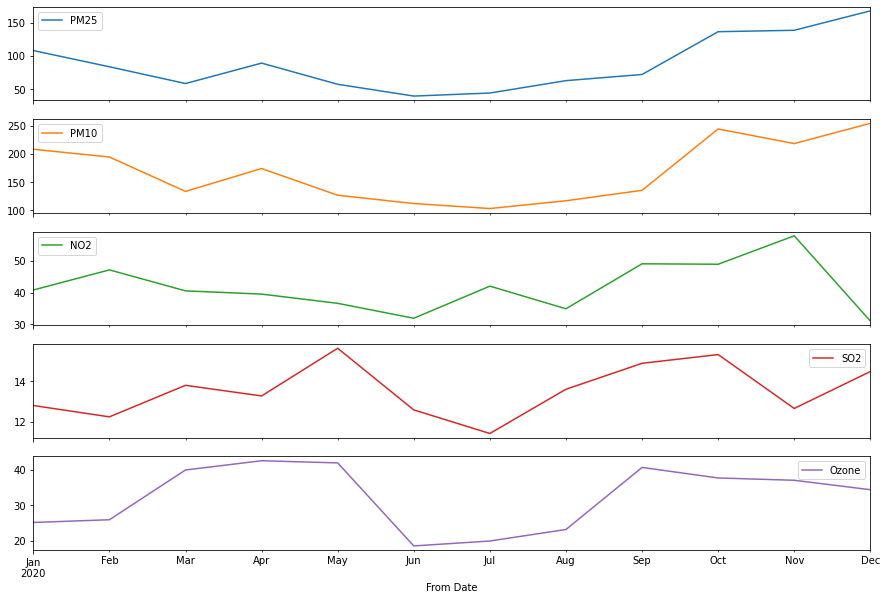

In [63]:



df_monthly.plot(subplots=True, figsize=(15,10))



### Another style of plotting:

Plots should be easy to read with the labels properly mentioned, units added and annotated 

figure saved= Timeseries_PM25_RKP.tiff


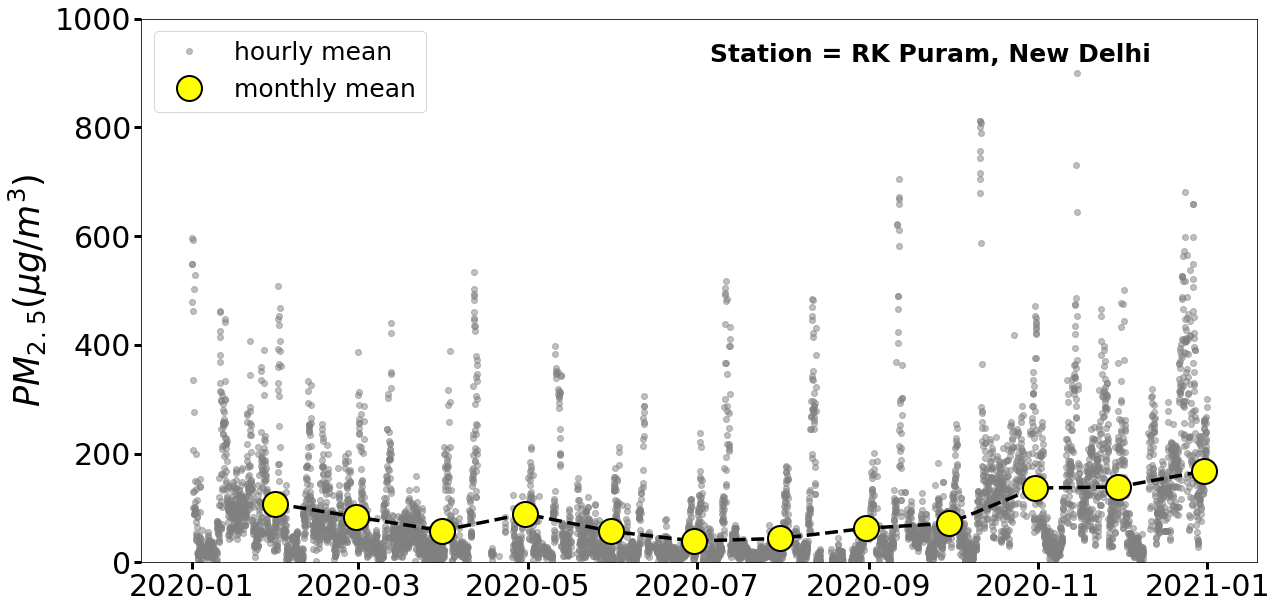

In [129]:
fig, ax = plt.subplots(figsize=(20,10))
   

#Plotting PM2.5 daily mean overlayed with monthly mean:    
y1=df['PM25'] #df with hourly mean values - original df
y2=df_monthly['PM25'] #df with monthly means
                     

#Plotting hourly mean values in the backdrop
plt.plot(y1,linestyle='',marker='o',color = 'grey',mec='grey',alpha = 0.5,linewidth='2.5',label='hourly mean')


#Overlaying hourly mean values with monthly means
plt.plot(y2,linestyle='--',color = 'black',linewidth='3.5') #monthlt means as dotted lines
plt.plot(y2,marker='o',markersize=25, linewidth=0,
     markerfacecolor='yellow',
     markeredgecolor='black',
     markeredgewidth=2, label='monthly mean') #monthly means as yellow dot




#Annotate the plot to mention the station(s)/state and make it more descriptive:
text = 'Station = RK Puram, New Delhi'
ax.text(0.52, 0.82, text, transform=fig.transFigure, fontsize = 25, weight = 'bold')


#Assign plot limits
plt.ylim(0, 1000)
    
#Tick parameters    
plt.xticks(fontsize=30)    
plt.yticks(fontsize=30) 
ax.tick_params(which='major', length=7, width=3)

#Axis labels
plt.xlabel("")
plt.ylabel('$PM_2$' +'$_.$'+'$_5$'+'($µg/m^3$)', fontsize=35)


#Legend
plt.legend(loc=2, prop={'size':25})
#legend_without_duplicate_labels(ax)
          

fig_title = 'Timeseries_PM25_RKP.tiff'
plt.savefig(fig_title, bbox_inches="tight")    


print ('figure saved=', fig_title)
plt.show()    


